In [147]:

!pip install --upgrade scikit-learn # Install or upgrade scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('ggplot')

In [148]:
df = pd.read_csv("Wine_quality.csv") # Read the CSV file into a Pandas DataFrame
print(df.shape) # Print the shape of the DataFrame (number of rows and columns)
df.head() # Display the first few rows of the DataFrame

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [149]:
df.info() #info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [150]:
df.describe() #description about dataframe

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [151]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [152]:
bins = (2, 6.5, 8)
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = ['bad','good'])

# **Data Visualization**

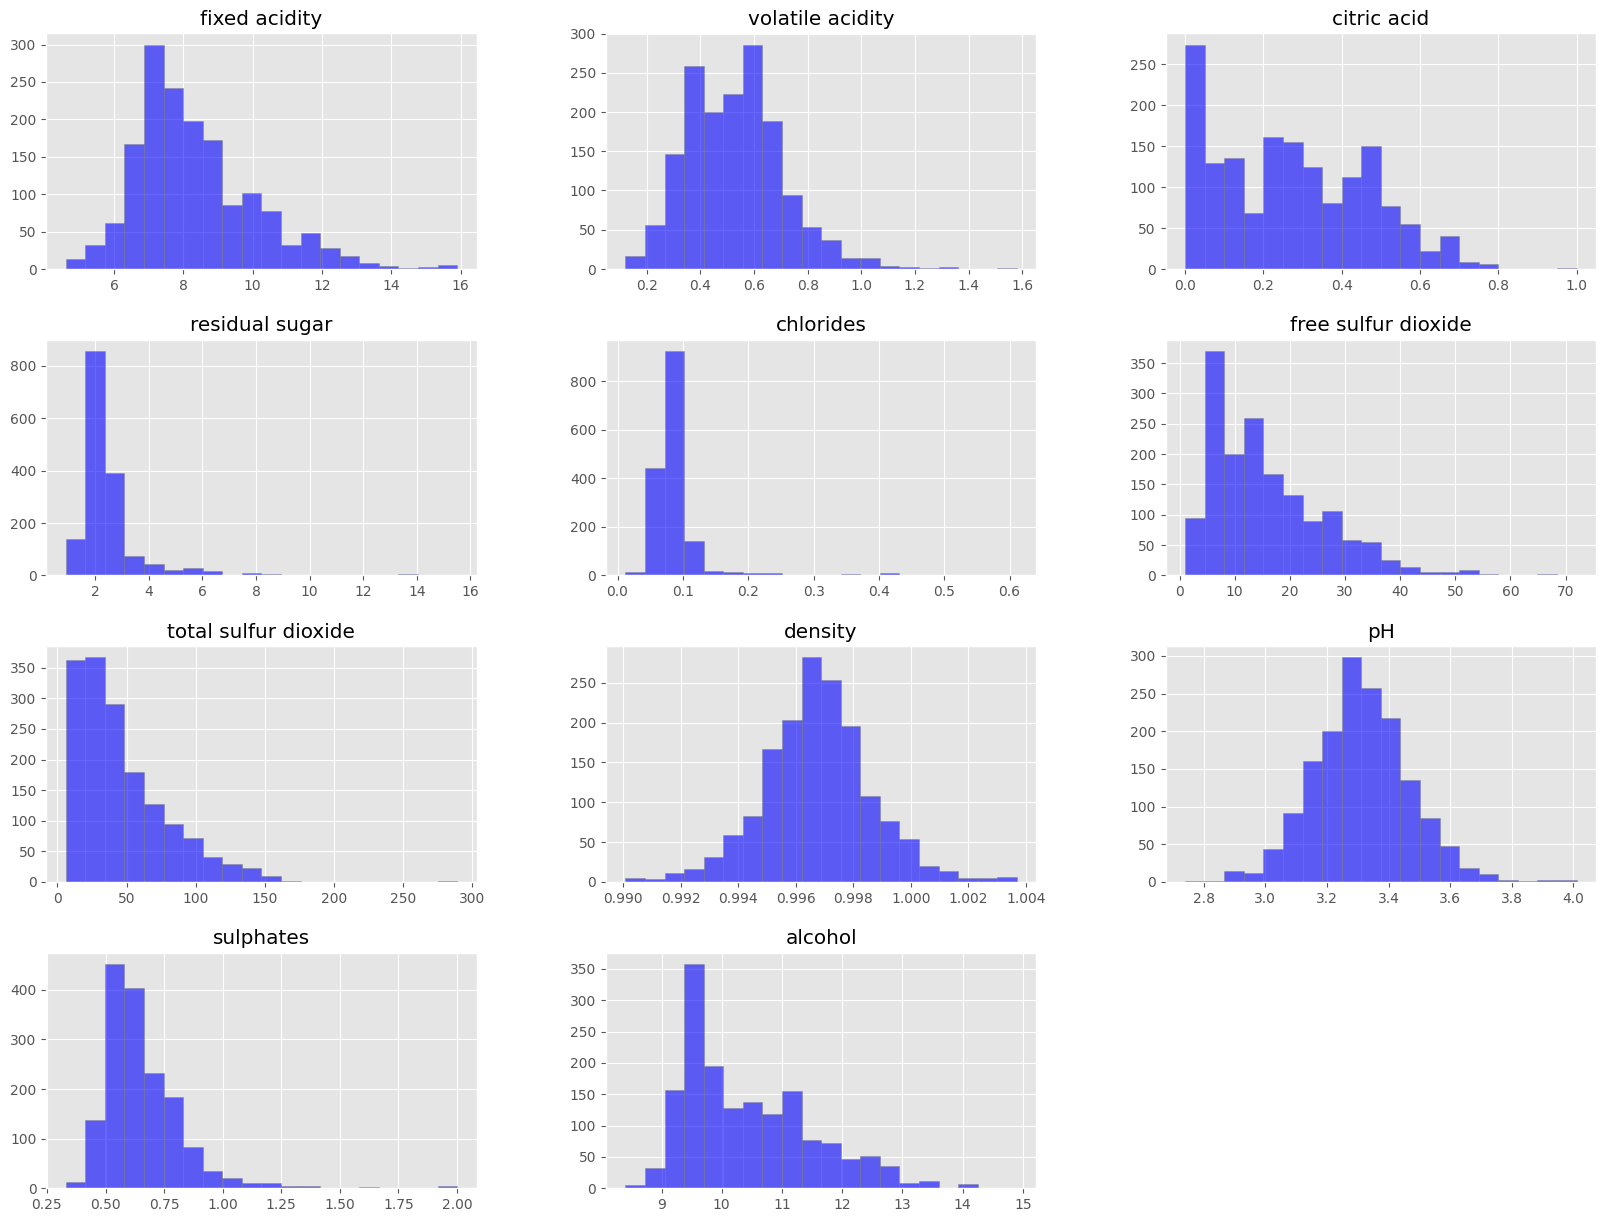

In [153]:
# Generate histograms for each numerical column in the DataFrame
# Set the figure size to (20, 15)
# Use grey edges, 20 bins, blue color, and 0.6 alpha for transparency
df.hist(figsize=(20,15),ec='grey',bins=20,color='blue',alpha=0.6)
plt.show()

<Figure size 1000x500 with 0 Axes>

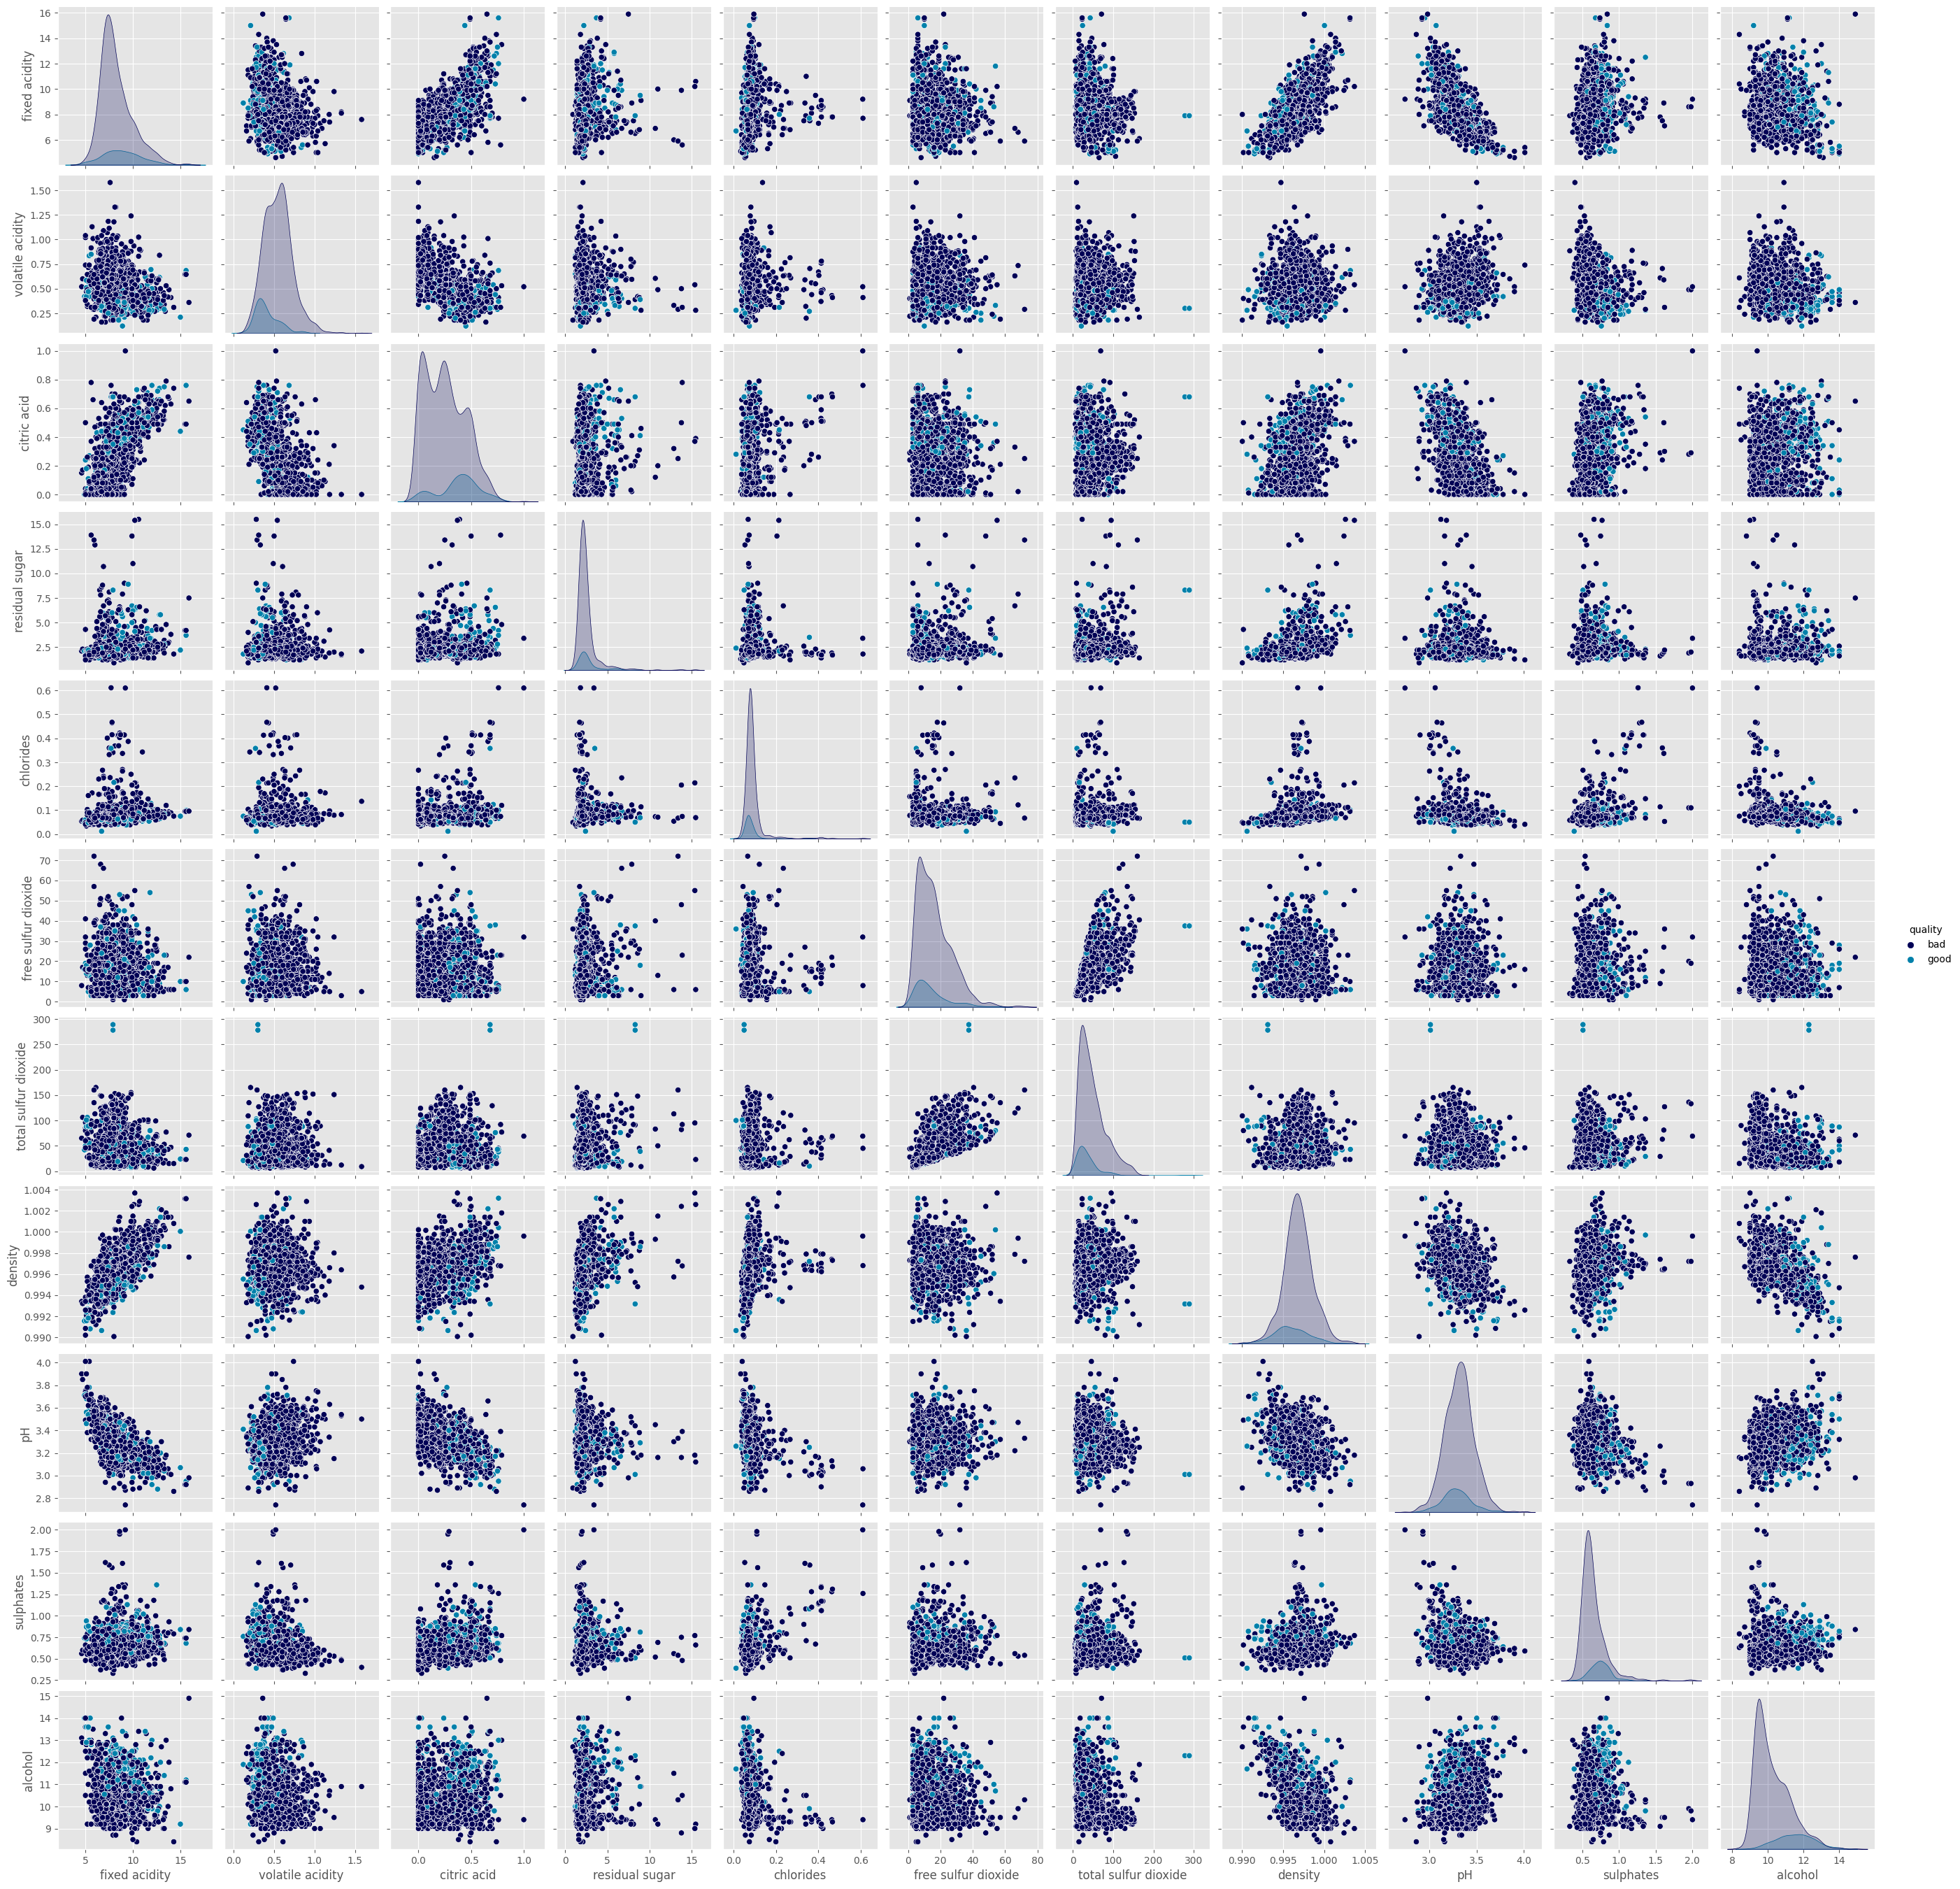

In [154]:
plt.figure(figsize=(10,5)) # Set the figure size to (10, 5) for better visibility
# Create a pairplot of the DataFrame 'df'
# - The 'hue' parameter colors the data points based on the values in the 'quality' column
# - The 'palette' parameter sets the color palette to 'ocean'
# - The 'diag_kind' parameter specifies the type of plots on the diagonal ('kde' for kernel density estimation)
sns.pairplot(df, hue="quality", palette="ocean",diag_kind="kde")

In [155]:
def kdeandbox(att1,att2):
    # Set the figure size for better visibility
    plt.figure(figsize=(14,9))
      # Plot KDE plots for the first attribute
    plt.subplot(2,2,1)
    sns.kdeplot(df.loc[df["quality"]=='bad'][att1],shade=True,color='red')
    sns.kdeplot(df.loc[df["quality"]=='good'][att1],shade=True,color='blue')
    plt.legend(["bad","good"])
    plt.title(att1.upper(),fontsize=15)
  # Plot KDE plots for the second attribute
    plt.subplot(2,2,2)
    sns.kdeplot(df.loc[df["quality"]=='bad'][att2],shade=True,color='red')
    sns.kdeplot(df.loc[df["quality"]=='good'][att2],shade=True,color='blue')
    plt.legend(["bad","good"])
    plt.title(att2.upper(),fontsize=15)
  # Plot violin plots for the first attribute
    plt.subplot(2,2,3)
    sns.violinplot(data=df,y=att1,x="quality",palette='viridis')
    # Plot violin plots for the second attribute
    plt.subplot(2,2,4)

    sns.violinplot(data=df,y=att2,x="quality",palette='viridis')

    plt.show()

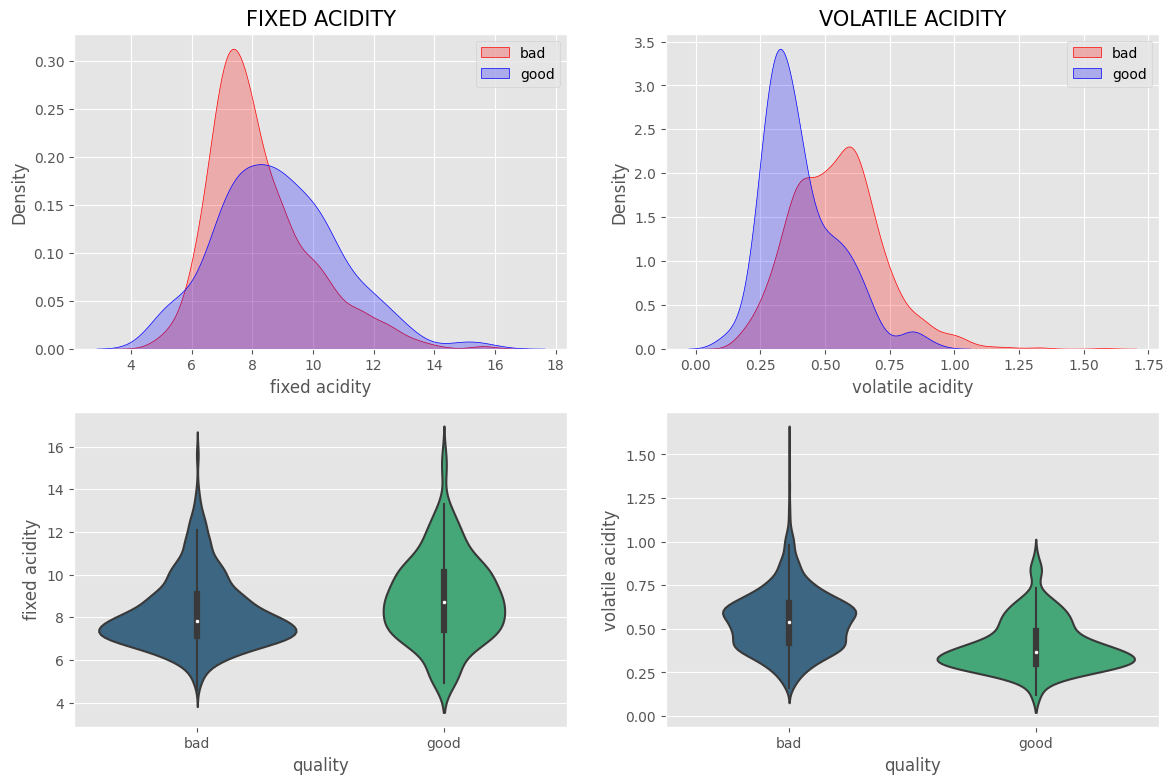

In [156]:
kdeandbox("fixed acidity","volatile acidity") # Generate a customized visualization for "fixed acidity" and "volatile acidity"

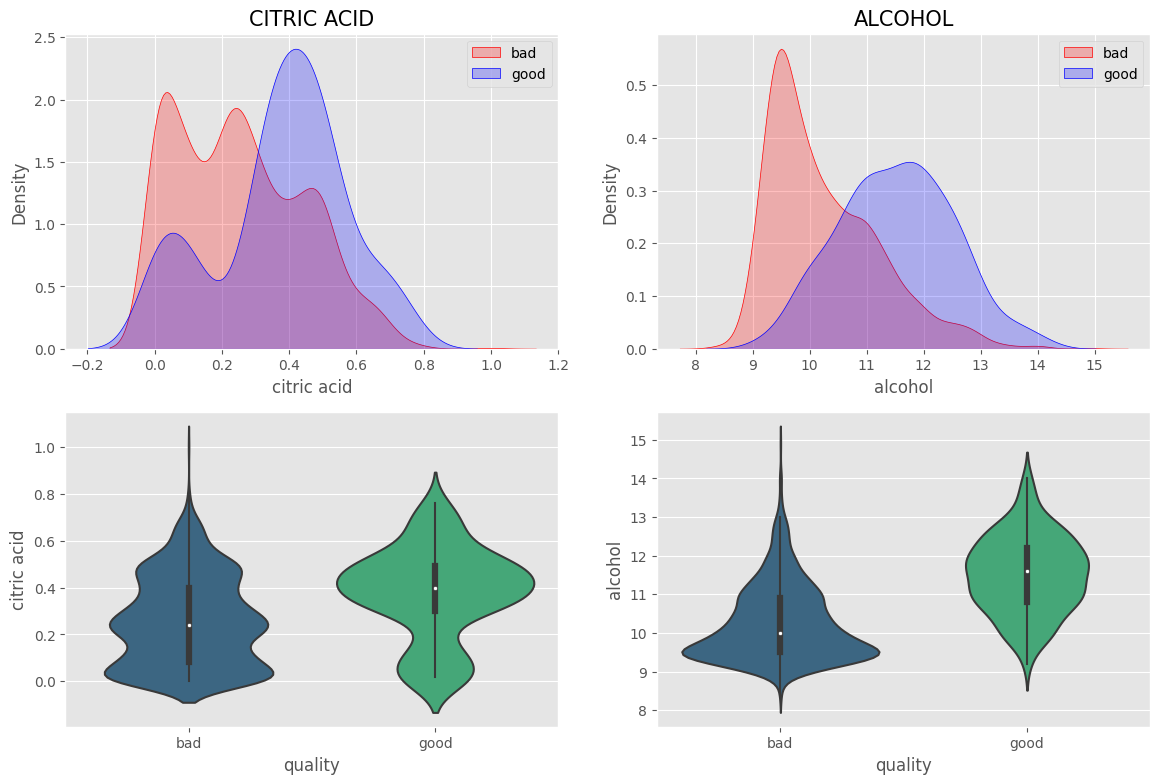

In [157]:
kdeandbox("citric acid","alcohol") # Generate a customized visualization for "citric acid" and "alcohol"

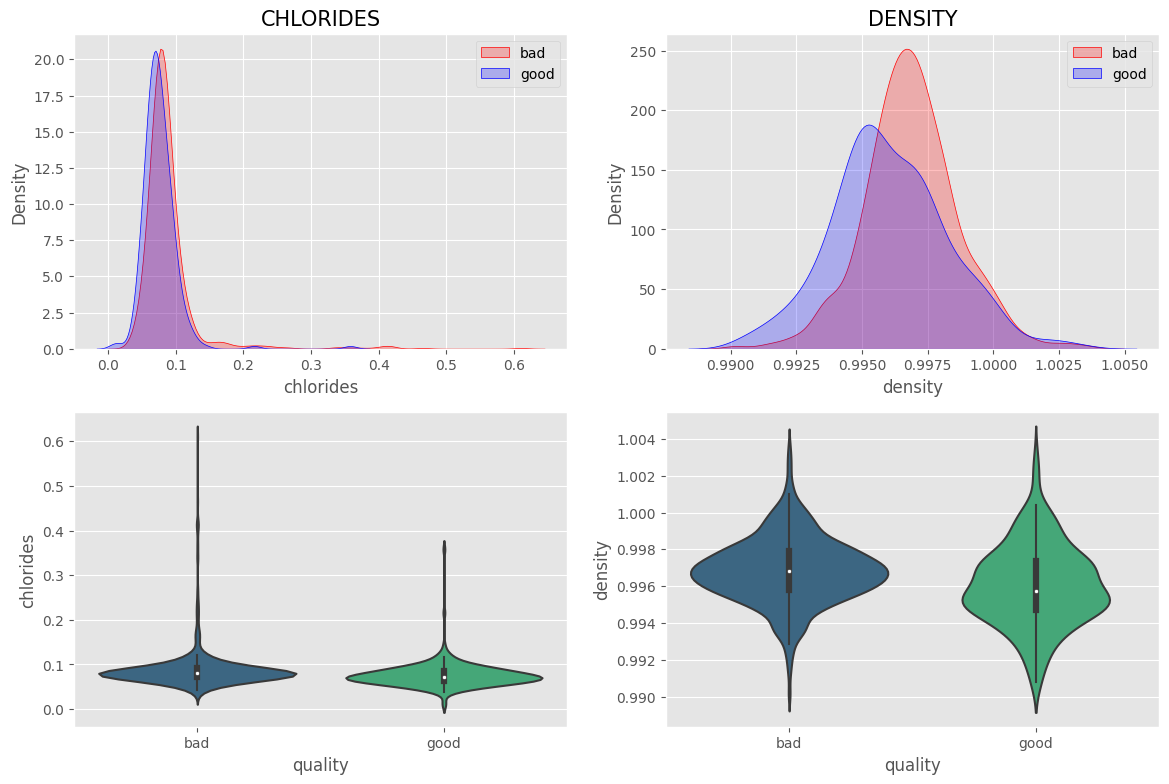

In [158]:
kdeandbox("chlorides","density") # Generate a customized visualization for "chlorides" and "density"

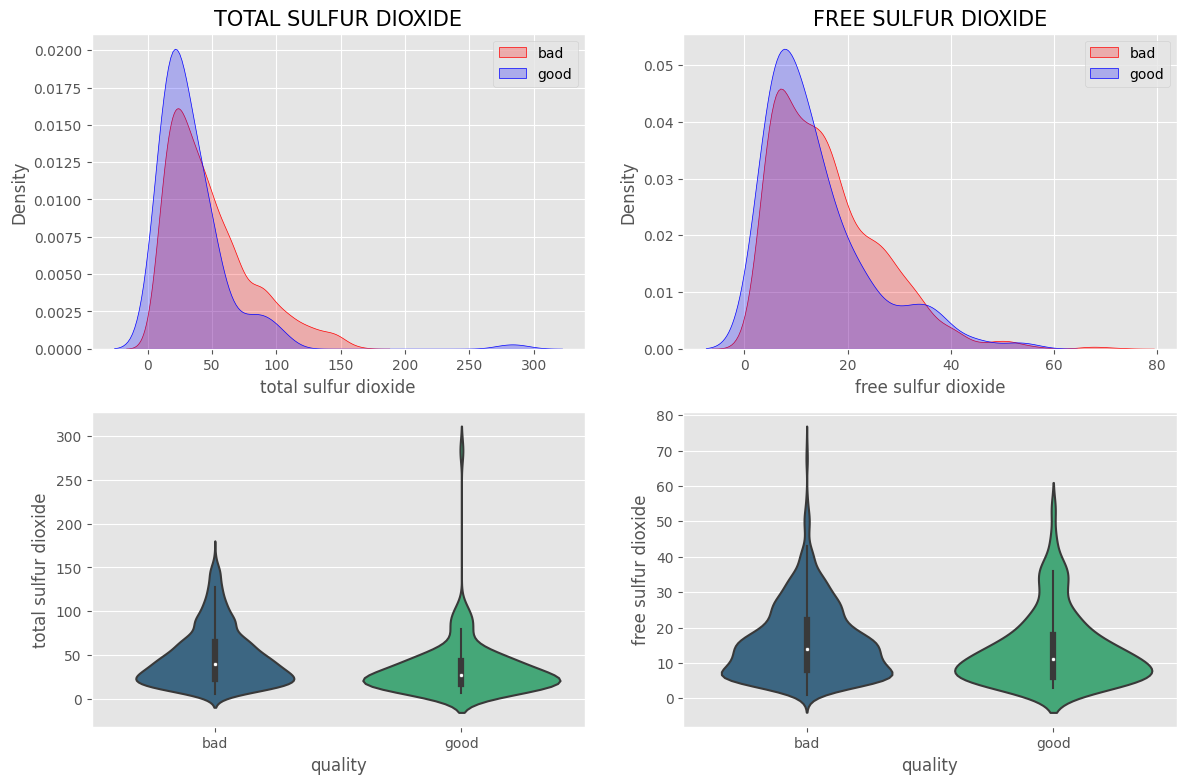

In [159]:
kdeandbox("total sulfur dioxide","free sulfur dioxide")

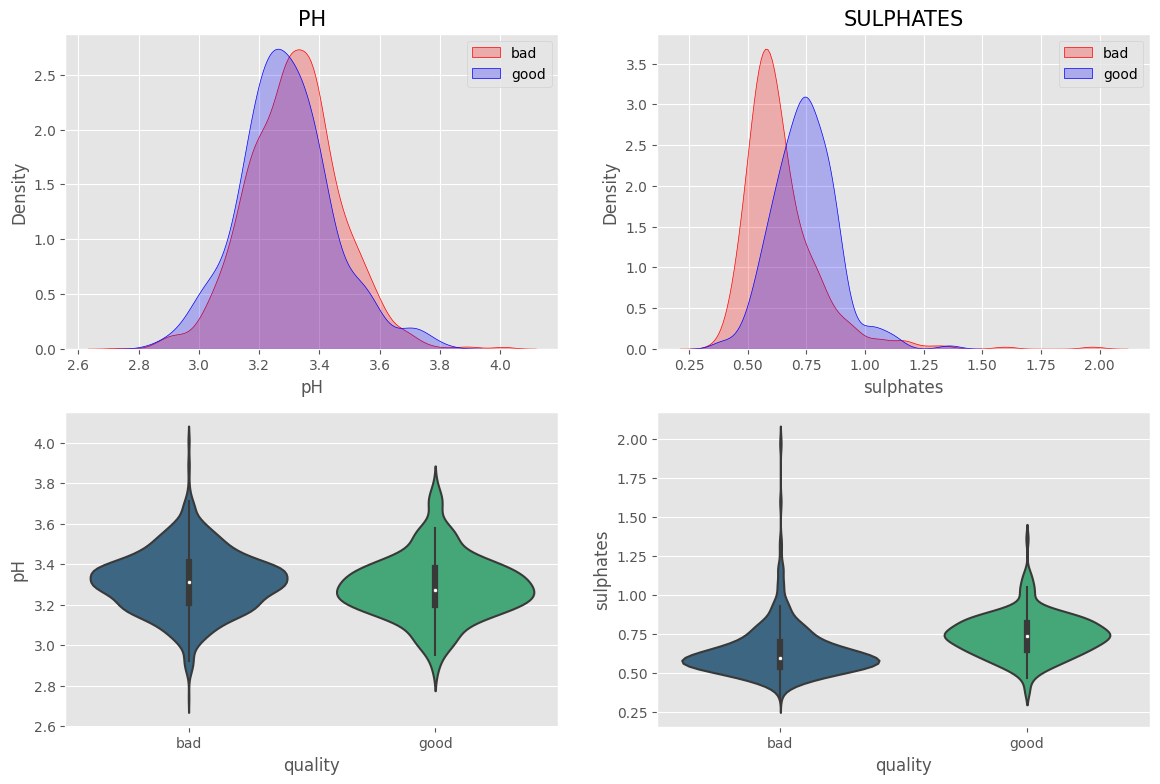

In [160]:
kdeandbox("pH","sulphates")

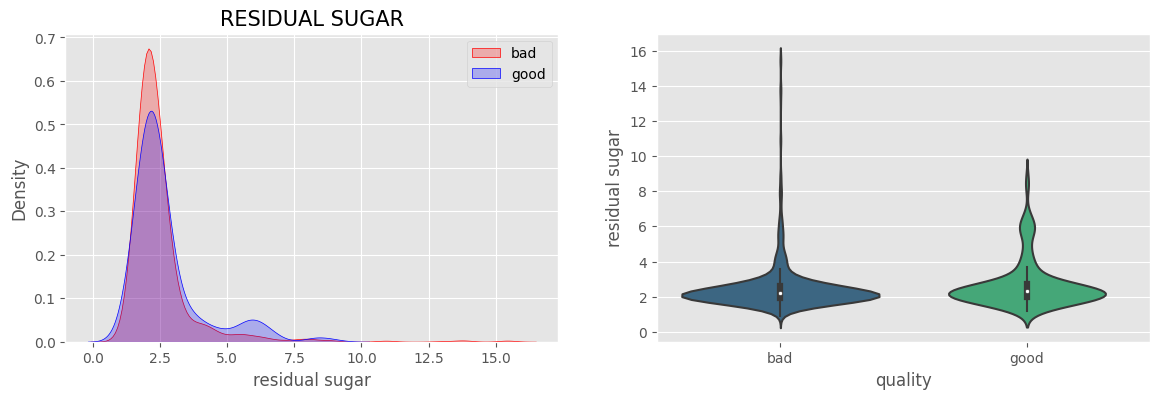

In [161]:
plt.figure(figsize=(14,4)) # Set the figure size for better visibility

plt.subplot(1,2,1) # Plot KDE plots for "residual sugar" in the first subplot
sns.kdeplot(df.loc[df["quality"]=='bad']["residual sugar"],shade=True,color='red')
sns.kdeplot(df.loc[df["quality"]=='good']["residual sugar"],shade=True,color='blue')
plt.legend(["bad","good"])
plt.title("residual sugar".upper(),fontsize=15)

plt.subplot(1,2,2) # Plot a violin plot for "residual sugar" in the second subplot
sns.violinplot(data=df,y="residual sugar",x="quality",palette='viridis')
plt.show()

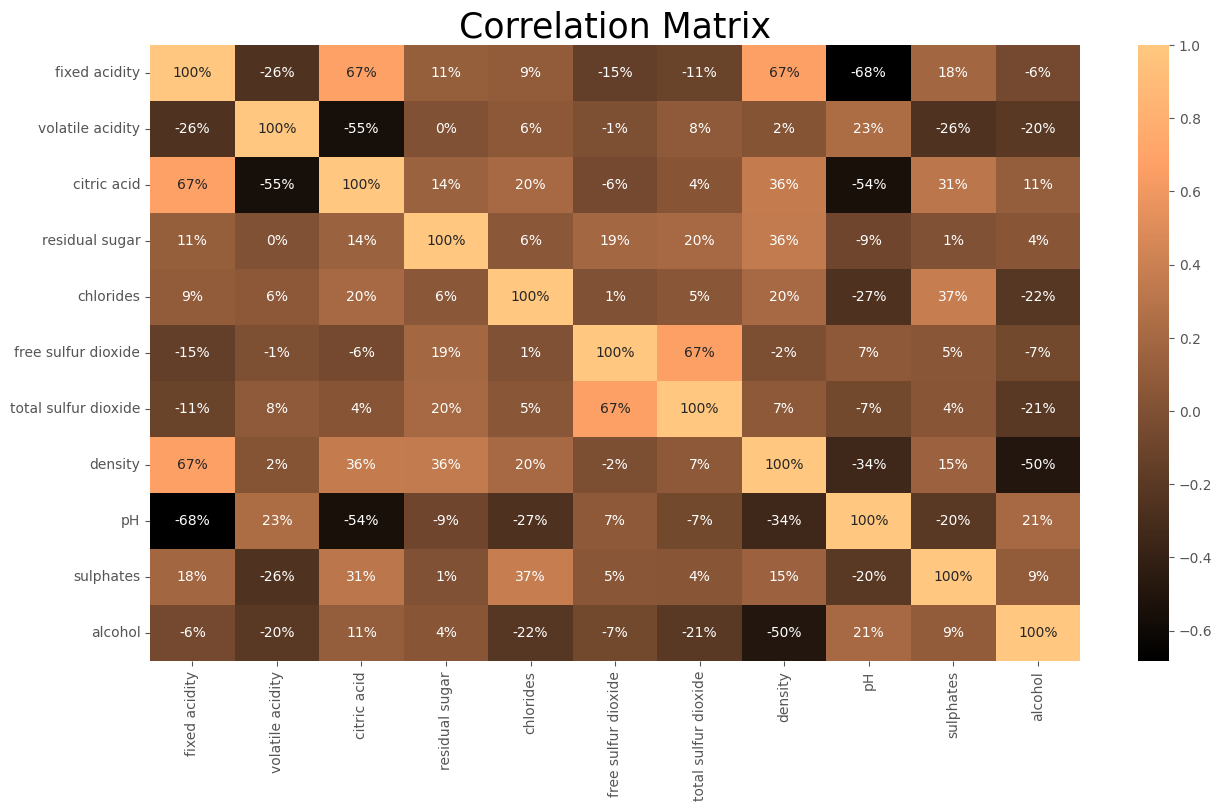

In [162]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='copper')# Create a heatmap of the correlation matrix
# - The 'annot' parameter displays the correlation values on the heatmap
# - The 'fmt' parameter formats the annotation values as percentages with zero decimal places
# - The 'cmap' parameter sets the color map to 'copper'
plt.title('Correlation Matrix',size=25) # Set the title for the heatmap
plt.show()

# **Data preprocessing**

In [163]:
df.isnull().sum() # Check for missing values in each column and sum the null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [164]:
df['quality'].value_counts()# Count the occurrences of each unique value in the 'quality' column

bad     1382
good     217
Name: quality, dtype: int64

In [165]:
labelencoder = LabelEncoder() # Initialize a LabelEncoder instance
df['quality'] = labelencoder.fit_transform(df['quality']) # Use the LabelEncoder to transform and encode the 'quality' column

In [166]:
X = df.drop(['quality'], axis=1) # Create the feature matrix X by dropping the 'quality' column
y = df.loc[:,['quality']] # Create the target variable vector y by selecting only the 'quality' column

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [168]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


In [169]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()# Standardize (normalize) the training features using the first scaler
sc2 = StandardScaler()# Standardize (normalize) the testing features using the second scaler
X_train = sc1.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)

# **Prediction Algorithms**

Logistic Reasoning

In [170]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [171]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 90.625


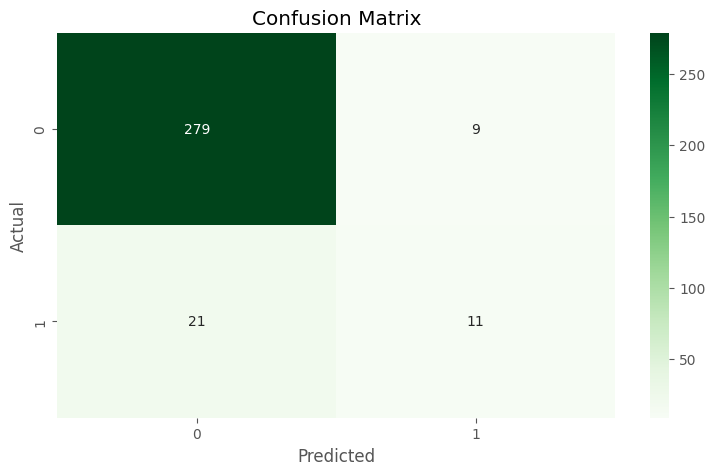

In [172]:

class_names = [0, 1]
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(9, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

Decision Tree Classifier

In [173]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [174]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 90.0


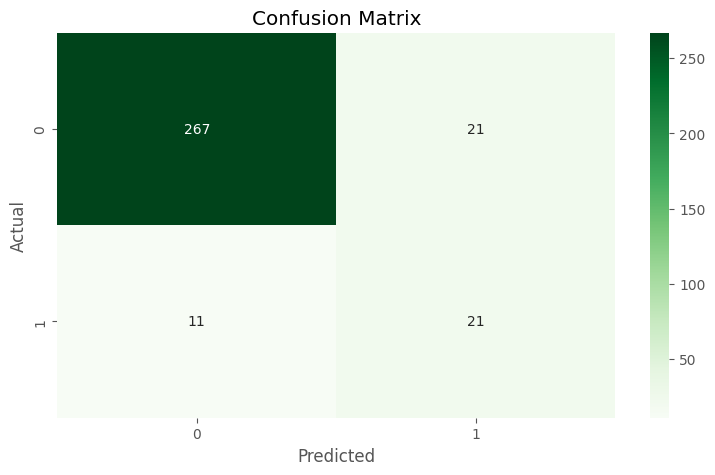

In [175]:
class_names = [0, 1]
cm1= confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(9, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Naive Bayes Classifier

In [176]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [177]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 80.0


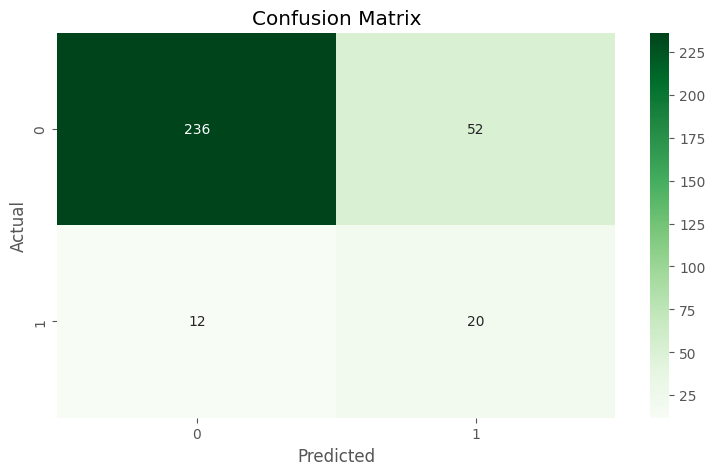

In [178]:
class_names = [0, 1]
cm2= confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(9, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Random Forest

In [179]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

In [180]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))


Accuracy Score = 92.1875


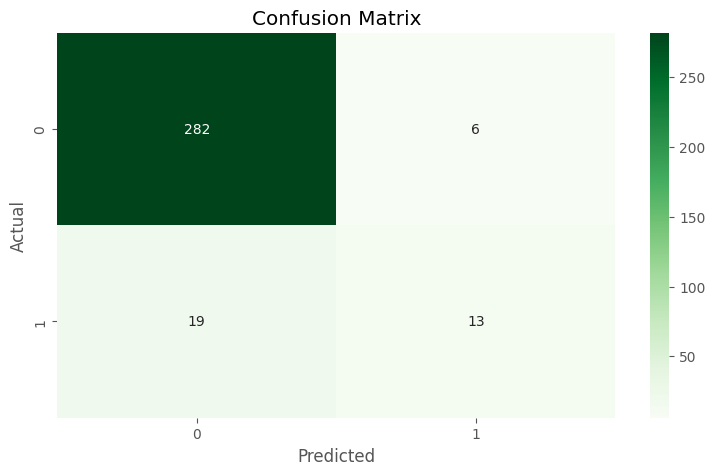

In [181]:
class_names = [0, 1]
cm3= confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(9, 5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Support Vector Machine

In [182]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

In [183]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 90.625


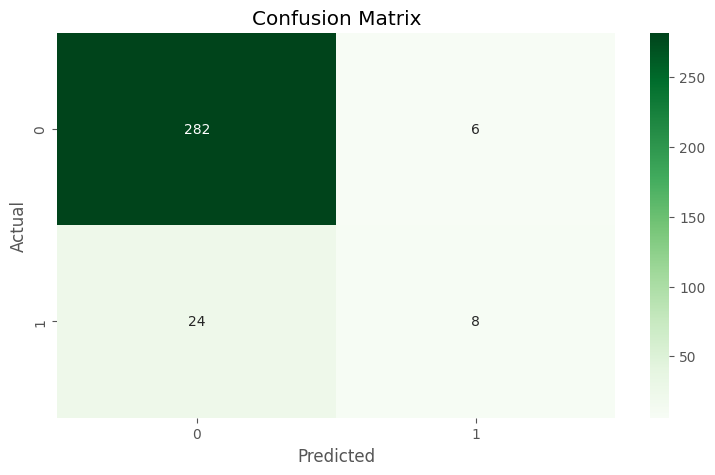

In [184]:
class_names = [0, 1]
cm4= confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(9, 5))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# KNN

In [185]:
model6=KNeighborsClassifier(n_neighbors=3)

In [186]:
model6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [187]:
y_pred=model6.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [188]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 89.375


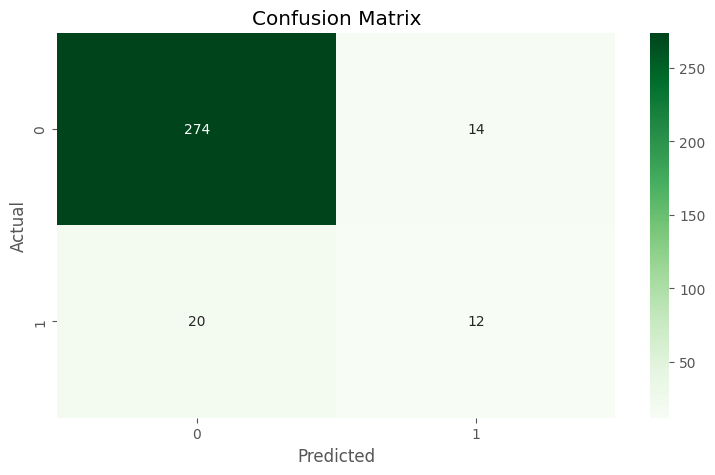

In [189]:
class_names = [0, 1]
cm4= confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(9, 5))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

# Cross Validation Score of the models

In [190]:
def CrossValidationScore(model_list):
    global X,y

    mean = []
    modelname = []

    for model in model_list:
        modelname.append(type(model).__name__)

    for i in model_list:
        scores = cross_val_score(i, X, y, cv=5)
        mean.append(scores.mean())

    cvs = pd.DataFrame({"Model Name":modelname,"CVS":mean})
    return cvs.style.background_gradient("Greens")

In [191]:
model_list=[model1,model2,model3,model4,model5,model6]

In [192]:
CrossValidationScore(model_list)